# **Importing the Required Libraries**

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten


# **Loading the Data set**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


### *Analyzing the images and Checking the Loading of the Data Set*

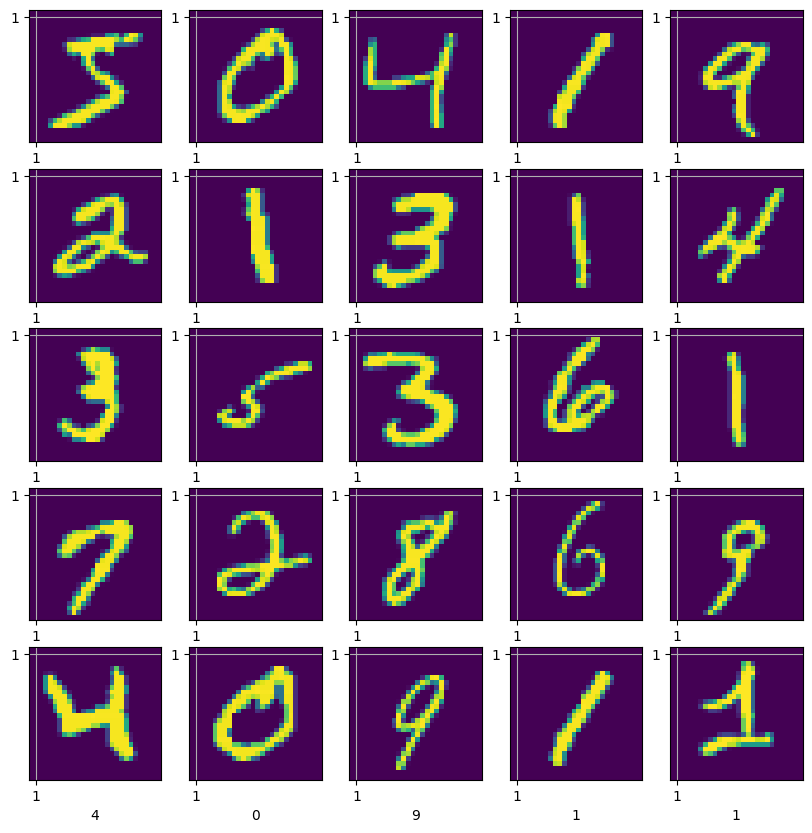

In [ ]:
#checking the firt 25 images
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([True])
  plt.yticks([True])
  plt.grid(True)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])

plt.show()

###*Checking the dinemensions of the data set*



In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

### *Checkig the Dimensionality of the data (channel_first or channel_last)*

In [ ]:
img_rows, img_cols=28, 28

if keras.backend.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  inpx = (img_rows, img_cols, 1)






In [ ]:
#converting the image arrays to float 32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


#Normlaizing the data

x_train /= 255
x_test /= 255

### *Creating categorical function for 10 Classes*

In [ ]:
# Here, 10 classes as the ouput is decided from the digits 0-9

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


(28, 28, 1)


# **Creating the Model using Convolutional Neural Networks**



In [ ]:
from keras import layers,models


# Building the Architecture of the model

model = models.Sequential()


#1 layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape = inpx))
model.add(layers.MaxPooling2D(pool_size = (3,3)))

#2 layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (3,3)))

#3 layer - Dropout layer
model.add(Dropout(0.5))

#4 layer - Flattening layer
model.add(layers.Flatten())

#5 layer - Dense layer 1
model.add(layers.Dense(250,activation = 'sigmoid'))

#6 layer - Softmax layer
model.add(layers.Dense(10,activation = 'softmax'))


# **Compiling the model**

In [ ]:


model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


*Model Summary*

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 2, 2, 64)          0         
                                                                 
 flatten (Flatten)           (None, 256)               0

# **Fitting the Model**

In [ ]:

model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 31s 255ms/step - loss: 2.4123 - accuracy: 0.0916
Epoch 2/12
120/120 [==============================] - 29s 240ms/step - loss: 2.4036 - accuracy: 0.0926
Epoch 3/12
120/120 [==============================] - 30s 254ms/step - loss: 2.3951 - accuracy: 0.0942
Epoch 4/12
120/120 [==============================] - 30s 251ms/step - loss: 2.3869 - accuracy: 0.0943
Epoch 5/12
120/120 [==============================] - 30s 251ms/step - loss: 2.3790 - accuracy: 0.0955
Epoch 6/12
120/120 [==============================] - 30s 248ms/step - loss: 2.3709 - accuracy: 0.0955
Epoch 7/12
120/120 [==============================] - 30s 251ms/step - loss: 2.3639 - accuracy: 0.0965
Epoch 8/12
120/120 [==============================] - 31s 258ms/step - loss: 2.3569 - accuracy: 0.0946
Epoch 9/12
120/120 [==============================] - 29s 246ms/step - loss: 2.3506 - accuracy: 0.0965
Epoch 10/12
120/120 [==============================] - 30s 246ms/step - l

# **Checking the Score of the above Model**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])


loss= 2.3309452533721924
accuracy= 0.10100000351667404


*The Accuracy is too Low, so createing another model and testing*

# **Creating Another Model**

In [ ]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


In [ ]:
model = Model([inpx], layer7)

In [ ]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 
model.fit(x_train, y_train, epochs=12, batch_size=500)

Compiling the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

*Model summary*

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                             

*Fitting the model*

In [ ]:
model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 165s 1s/step - loss: 2.7353 - accuracy: 0.0992
Epoch 2/12
120/120 [==============================] - 161s 1s/step - loss: 2.6955 - accuracy: 0.0992
Epoch 3/12
120/120 [==============================] - 162s 1s/step - loss: 2.6550 - accuracy: 0.0992
Epoch 4/12
120/120 [==============================] - 163s 1s/step - loss: 2.6142 - accuracy: 0.0992
Epoch 5/12
120/120 [==============================] - 162s 1s/step - loss: 2.5727 - accuracy: 0.0992
Epoch 6/12
120/120 [==============================] - 162s 1s/step - loss: 2.5313 - accuracy: 0.0992
Epoch 7/12
120/120 [==============================] - 161s 1s/step - loss: 2.4905 - accuracy: 0.0992
Epoch 8/12
120/120 [==============================] - 160s 1s/step - loss: 2.4506 - accuracy: 0.0992
Epoch 9/12
120/120 [==============================] - 161s 1s/step - loss: 2.4120 - accuracy: 0.0993
Epoch 10/12
120/120 [==============================] - 161s 1s/step - loss: 2.3762 - accura

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 2.2928338050842285
accuracy= 0.13040000200271606


In [ ]:

test_predict = []
for x in range(25):

  result = model.predict(np.array([x_test[x]]))
  predicted_value = np.argmax(result)
  test_predict.append(predicted_value)


1/1 [==============================] - 0s 21ms/step


# **Printing the predicted images**

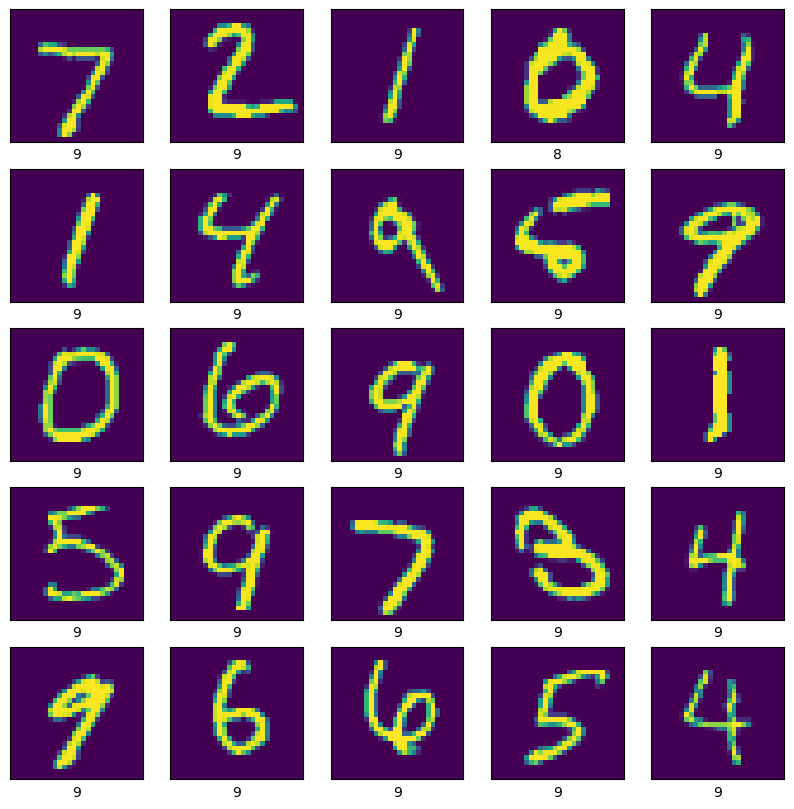

In [ ]:
plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([]
  plt.grid(True)
  plt.imshow(x_test[i])
  plt.xlabel(test_predict[i])

plt.show()